# Main code start Here

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



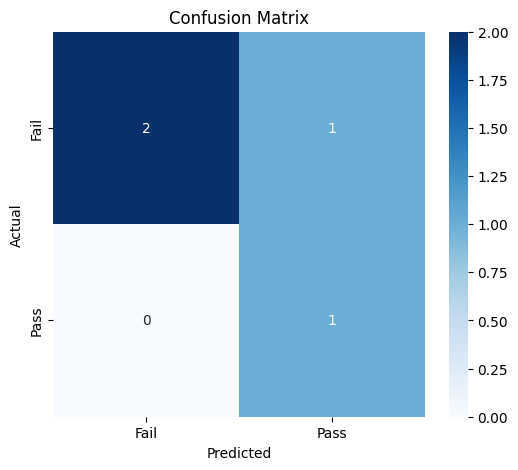


----- Predict Your Result -----
Enter Study Hours: 2
Enter Attendance: 40
Enter Past Score: 76
Enter Sleep Hours: 7
Enter Internet (0 = No, 1 = Yes): 1
Prediction Based on Input: Fail


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Student_data.csv')

# Label Encoding
le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])
df['Passed']  = le.fit_transform(df['Passed'])

# Features (Notice: Passed is removed here)
features = ['StudyHours', 'Attendance', 'PastScore', 'Internet', 'Sleephours']

# Scaling only features, NOT y
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# X and y
X = df_scaled[features]
y = df['Passed']   # Original 0/1 values, not scaled

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# User Prediction
print("\n----- Predict Your Result -----")

try:
    StudyHours = float(input("Enter Study Hours: "))
    Attendance = float(input("Enter Attendance: "))
    PastScore = float(input("Enter Past Score: "))
    Sleephours = float(input("Enter Sleep Hours: "))
    Internet = float(input("Enter Internet (0 = No, 1 = Yes): "))

    user_input_df = pd.DataFrame([{
        'StudyHours': StudyHours,
        'Attendance': Attendance,
        'PastScore': PastScore,
        'Internet': Internet,
        'Sleephours': Sleephours
    }])

    user_input_scaled = scaler.transform(user_input_df)
    user_prediction = model.predict(user_input_scaled)[0]

    result = "Pass" if user_prediction == 1 else "Fail"
    print(f"Prediction Based on Input: {result}")

except Exception as e:
    print("Some error occurred:", e)
